# Importing dataset and pre-processing

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gsimonx37/letterboxd")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Owner\.cache\kagglehub\datasets\gsimonx37\letterboxd\versions\2


In [2]:
import pandas as pd

### For the purpose of conducting sentiment analysis on the training dataset, we must merge a few of these CSV files together so the neccessary columns are included in the pandas dataframe 'books'

In [10]:
# Getting all files read into their unique dataframes
df1 = pd.read_csv(f"{path}/movies.csv")
df2 = pd.read_csv(f"{path}/themes.csv")
df3 = pd.read_csv(f"{path}/genres.csv")

# one to many relationships in these two dataframes to the movie_id
genres_grouped = df3.groupby('id')['genre'].apply(lambda x: ', '.join(x)).reset_index()
themes_grouped = df2.groupby('id')['theme'].apply(lambda x: ', '.join(x)).reset_index()

# Merge them on 'movie_id'
books = df1.merge(themes_grouped, on="id", how="inner") \
               .merge(genres_grouped, on="id", how="inner")

In [13]:
# Grab the year for the date
books['date'] = books['date'].astype(str).str[:4]

books

,id,name,date,tagline,description,minute,rating,theme,genre
0,1000001,Barbie,2023,She's everything. He's just Ken.,Barbie and Ken are having the time of their li...,114.0,3.86,"Humanity and the world around us, Crude humor ...","Comedy, Adventure"
1,1000002,Parasite,2019,Act like you own the place.,"All unemployed, Ki-taek's family takes peculia...",133.0,4.56,"Humanity and the world around us, Intense viol...","Comedy, Thriller, Drama"
2,1000003,Everything Everywhere All at Once,2022,The universe is so much bigger than you realize.,An aging Chinese immigrant is swept up in an i...,140.0,4.30,"Humanity and the world around us, Moving relat...","Science Fiction, Adventure, Comedy, Action"
3,1000004,Fight Club,1999,Mischief. Mayhem. Soap.,A ticking-time-bomb insomniac and a slippery s...,139.0,4.27,"Intense violence and sexual transgression, Hum...",Drama
4,1000005,La La Land,2016,Here's to the fools who dream.,"Mia, an aspiring actress, serves lattes to mov...",129.0,4.09,"Song and dance, Humanity and the world around ...","Drama, Comedy, Music, Romance"
...,...,...,...,...,...,...,...,...,...
24414,1664306,Fixerr,2019,NaN,ATS Officer Jayveer Malik’s stands suspended a...,324.0,NaN,"Thrillers and murder mysteries, High speed and...",Drama
24415,1693420,"LSD - Love, Scandal and Doctors",2021,NaN,"Love, Scandal and Doctors is a story of 5 medi...",300.0,NaN,"Thrillers and murder mysteries, High speed and...","Drama, Mystery"
24416,1702871,Olessia,2019,NaN,Film with a soundtrack featuring G. Venugopal ...,NaN,NaN,"Song and dance, Dazzling vocal performances an...",Drama
24417,1762425,Pretty Things,2005,NaN,A look into the world of 20th century burlesqu...,90.0,NaN,"Song and dance, Erotic relationships and desire",Documentary


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

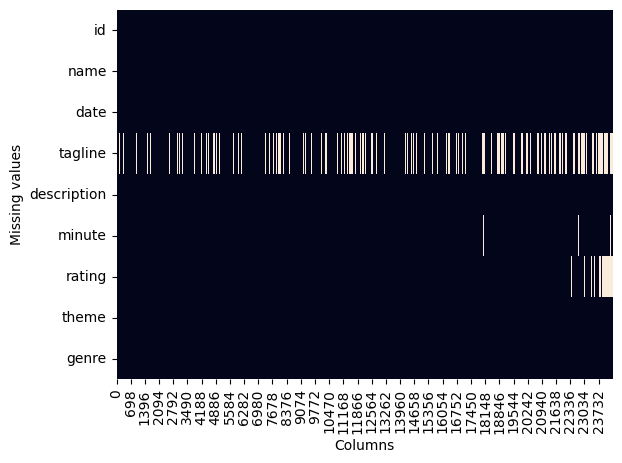

In [15]:
ax = plt.axes()
sns.heatmap(books.isna().transpose(), cbar=False, ax=ax)

plt.xlabel("Columns")
plt.ylabel("Missing values")

plt.show()

### For now, we will keep rows with missing values in the dataframe, and if bias is observed later on, we will deal with them....

### MOVING ON... we will check to see if there are any categories from theme or genres that seem to be too unique. As in, only a couple movies have that theme/genre and the rest don't.

In [17]:
# books["genre"].value_counts().reset_index().sort_values("count", ascending=False)
books['genre'].str.split(', ').explode().value_counts()


genre
Drama              11823
Comedy              6610
Thriller            6007
Horror              4795
Action              4388
Romance             4114
Crime               3568
Adventure           2580
Science Fiction     2508
Mystery             2340
Fantasy             1792
Family              1443
History             1110
Documentary         1024
Animation           1004
War                  961
Music                926
TV Movie             620
Western              570
Name: count, dtype: int64

### I feel as though there are a significant number for each genre type so there is no issue here. Let's check Themes...

In [18]:
books['theme'].str.split(', ').explode().value_counts()


theme
Moving relationship stories             4001
Crude humor and satire                  3814
Horror                                  3732
the undead and monster classics         3732
Twisted dark psychological thriller     3305
                                        ... 
Air pilot heroism and survival           215
Underdog fighting and boxing stories     183
Teen friendship and coming-of-age         91
Engaging                                  68
intense crime and casino drama            68
Name: count, Length: 140, dtype: int64

### Well, lets just leave that for later... I think the clean up for Theme might be a bit more lengthy than expected.

### TODO: Probably also see if we want to clean up the descriptions of each movie, perhaps remove the short descriptions out so we can get only meaninful descriptions in the df only

# Vector Search / Langchain